# Working with SQLite and Pandas Homework

### 1. Set Up the Database

In [1]:
#Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('student_grades.db')

# Create cursor object
c = conn.cursor()

### 2. Create the Necessary Tables

In [2]:
# Create "students" table to store student information
c.execute(
    """CREATE TABLE students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
    );"""
)
conn.commit()

In [3]:
# Create "grades" table to store student grades for different subjects
c.execute(
    """CREATE TABLE grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
    );"""
)
conn.commit()

### 3. Insert Data into the Tables

In [4]:
# Inserting the data into the "students" table
c.execute("INSERT INTO students (first_name, last_name) VALUES ('Alice', 'Johnson')")
c.execute("INSERT INTO students (first_name, last_name) VALUES ('Bob', 'Smith')")
c.execute("INSERT INTO students (first_name, last_name) VALUES ('Carol', 'White')")
c.execute("INSERT INTO students (first_name, last_name) VALUES ('David', 'Brown')")
c.execute("INSERT INTO students (first_name, last_name) VALUES ('Eve', 'Davis')")

conn.commit()

In [5]:
# Inserting the data into the "grades" table
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (1, 'Math', 95)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (1, 'English', 88)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (1, 'History', 90)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (2, 'Math', 82)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (2, 'English', 76)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (2, 'History', 85)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (3, 'Math', 78)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (3, 'English', 94)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (3, 'History', 85)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (4, 'Math', 92)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (4, 'English', 93)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (4, 'History', 93)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (5, 'Math', 91)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (5, 'English', 90)")
c.execute("INSERT INTO grades (student_id, subject, grade) VALUES (5, 'History', 94)")

conn.commit()


### 4. Perform SQL Queries

In [6]:
%load_ext sql
%sql sqlite:///student_grades.db

In [7]:
# 1. Retrieve all students' names and their grades
%%sql
SELECT DISTINCT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id;

 * sqlite:///student_grades.db
Done.


first_name,last_name,subject,grade
Alice,Johnson,Math,95
Alice,Johnson,English,88
Alice,Johnson,History,90
Bob,Smith,Math,82
Bob,Smith,English,76
Bob,Smith,History,85
Carol,White,Math,78
Carol,White,English,94
Carol,White,History,85
David,Brown,Math,92


In [8]:
# 2. Find the average grade for each student
%%sql
SELECT s.first_name, s.last_name, AVG(g.grade) AS avg_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id;

 * sqlite:///student_grades.db
Done.


first_name,last_name,avg_grade
Alice,Johnson,91.0
Bob,Smith,81.0
Carol,White,85.66666666666667
David,Brown,92.66666666666667
Eve,Davis,91.66666666666667


In [9]:
# 3. Find the student with the highest average grade
%%sql
SELECT s.first_name, s.last_name, AVG(g.grade) AS avg_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id
ORDER BY avg_grade DESC
LIMIT 1;

 * sqlite:///student_grades.db
Done.


first_name,last_name,avg_grade
David,Brown,92.66666666666667


In [10]:
# 4. Find the average grade for the Math subject
%%sql
SELECT AVG(grade) AS avg_math_grade
FROM grades
WHERE subject = 'Math'

 * sqlite:///student_grades.db
Done.


avg_math_grade
87.6


In [11]:
# 5. List all students who scored above 90 in any subject
%%sql
SELECT DISTINCT s.first_name, s.last_name
FROM students s
JOIN grades g ON s.student_id = g.student_id
WHERE g.grade > 90;

 * sqlite:///student_grades.db
Done.


first_name,last_name
Alice,Johnson
Carol,White
David,Brown
Eve,Davis


### 5. Load Data into Pandas

In [12]:
# Load data from students table into a DataFrame
students_df = pd.read_sql_query("SELECT * FROM students", conn)

# Load data from grades table into a DataFrame
grades_df = pd.read_sql_query("SELECT * FROM grades", conn)

In [14]:
# Combine data from both tables into a single DataFrame
student_grades_df = pd.read_sql_query("""
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
""", conn)

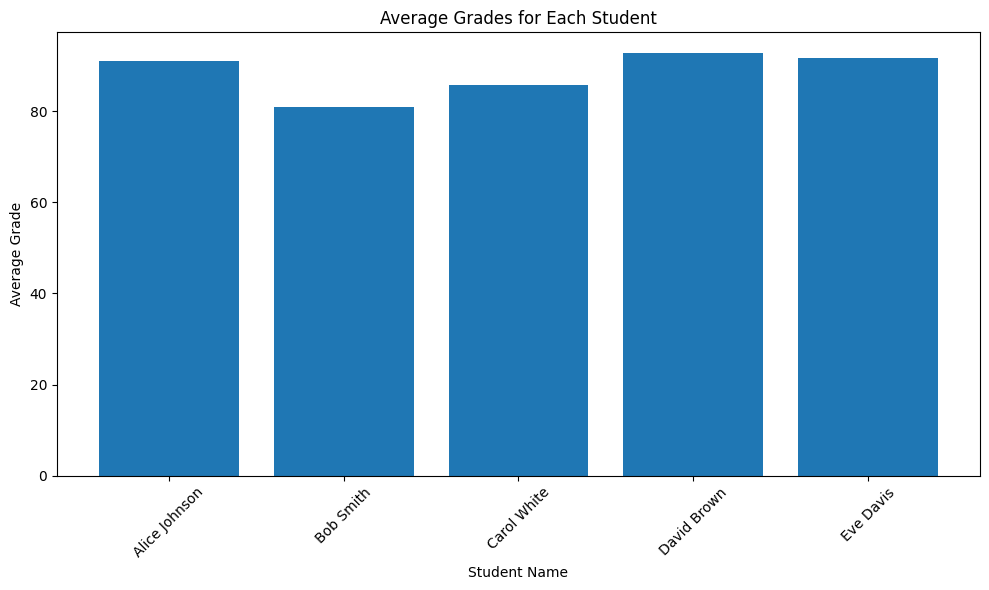

In [24]:
# Calculate the average grades for each student
avg_grades_by_student = student_grades_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()

# Plot the average grades for each student
plt.figure(figsize=(10, 6))
plt.bar(avg_grades_by_student['first_name'] + ' ' + avg_grades_by_student['last_name'], avg_grades_by_student['grade'])
plt.title('Average Grades for Each Student')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

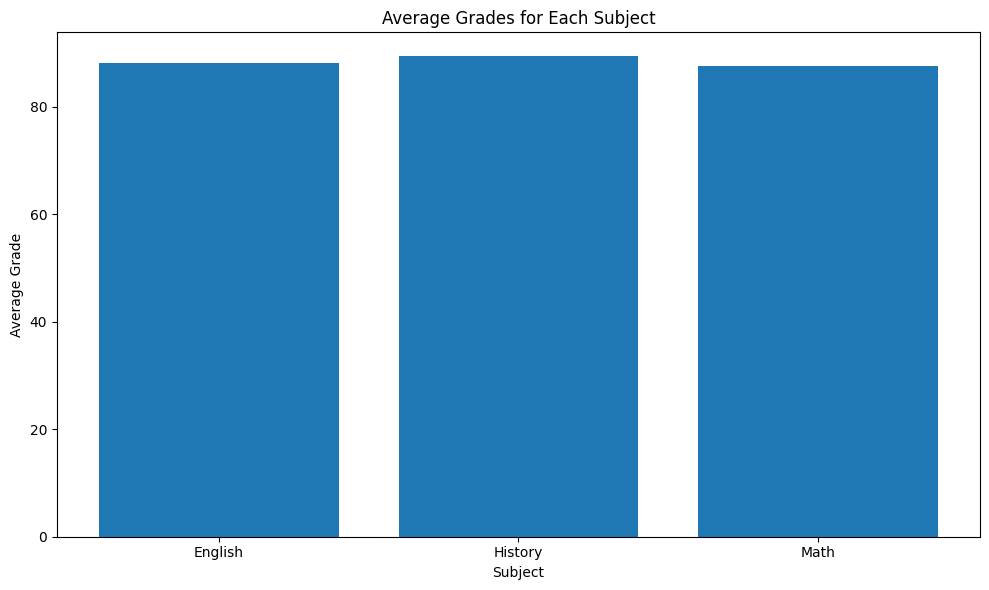

In [25]:
# Calculate average grades for each subject
avg_grades_by_subject = student_grades_df.groupby('subject')['grade'].mean().reset_index()

# Create a bar chart showing the average grade for each subject
plt.figure(figsize=(10, 6))
plt.bar(avg_grades_by_subject['subject'], avg_grades_by_subject['grade'])
plt.title('Average Grades for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.tight_layout()
plt.show()